In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_csv('hepatitis_csv.csv')

In [3]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


### Exploratory Analysis

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [5]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [6]:
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [7]:
df_object = df.select_dtypes('object')

In [8]:
for i,j in df_object.items():
    unique_items = df[i].unique()
    print(f'unique items in {i} are {unique_items} ')

unique items in sex are ['male' 'female'] 
unique items in steroid are [False True nan] 
unique items in fatigue are [False True nan] 
unique items in malaise are [False True nan] 
unique items in anorexia are [False True nan] 
unique items in liver_big are [False True nan] 
unique items in liver_firm are [False True nan] 
unique items in spleen_palpable are [False True nan] 
unique items in spiders are [False True nan] 
unique items in ascites are [False True nan] 
unique items in varices are [False nan True] 
unique items in class are ['live' 'die'] 


In [9]:
df_object.isnull().sum()

sex                 0
steroid             1
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
class               0
dtype: int64

In [10]:
for i,j in (df_object.isnull().sum().items()):
    if j != 0:
        print(f'{i} having {j} ')
    else:
        pass

steroid having 1 
fatigue having 1 
malaise having 1 
anorexia having 1 
liver_big having 10 
liver_firm having 11 
spleen_palpable having 5 
spiders having 5 
ascites having 5 
varices having 5 


In [11]:
value_na  = df[['steroid','malaise','fatigue','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices']]

In [12]:
for i in value_na:
    df[i]=df[i].fillna(df[i].mode()[0])

In [13]:
df.isnull().sum()

age                 0
sex                 0
steroid             0
antivirals          0
fatigue             0
malaise             0
anorexia            0
liver_big           0
liver_firm          0
spleen_palpable     0
spiders             0
ascites             0
varices             0
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [14]:
# dropping protime 

df.drop('protime',axis=1,inplace=True)

In [15]:
df_float = df.select_dtypes('float64')

In [16]:
df_float.isnull().sum()

bilirubin         6
alk_phosphate    29
sgot              4
albumin          16
dtype: int64

In [17]:
for i in df_float:
    df[i] = df[i].fillna(df[i].median())

In [18]:
df.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
histology          0
class              0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          155 non-null    bool   
 3   antivirals       155 non-null    bool   
 4   fatigue          155 non-null    bool   
 5   malaise          155 non-null    bool   
 6   anorexia         155 non-null    bool   
 7   liver_big        155 non-null    bool   
 8   liver_firm       155 non-null    bool   
 9   spleen_palpable  155 non-null    bool   
 10  spiders          155 non-null    bool   
 11  ascites          155 non-null    bool   
 12  varices          155 non-null    bool   
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    float64
 15  sgot             155 non-null    float64
 16  albumin          155 non-null    float64
 17  histology       

In [20]:
numeric_data = df._get_numeric_data()
numeric_data.head()

,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology
0,30,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False
1,50,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False
2,78,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False
3,31,True,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,False
4,34,True,False,False,False,False,True,False,False,False,False,False,1.0,85.0,200.0,4.0,False


In [21]:
numeric_data.drop('antivirals', axis=1, inplace=True)
numeric_data.drop('histology', axis=1, inplace=True)

In [22]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   steroid          155 non-null    bool   
 2   fatigue          155 non-null    bool   
 3   malaise          155 non-null    bool   
 4   anorexia         155 non-null    bool   
 5   liver_big        155 non-null    bool   
 6   liver_firm       155 non-null    bool   
 7   spleen_palpable  155 non-null    bool   
 8   spiders          155 non-null    bool   
 9   ascites          155 non-null    bool   
 10  varices          155 non-null    bool   
 11  bilirubin        155 non-null    float64
 12  alk_phosphate    155 non-null    float64
 13  sgot             155 non-null    float64
 14  albumin          155 non-null    float64
dtypes: bool(10), float64(4), int64(1)
memory usage: 7.7 KB


<AxesSubplot:>

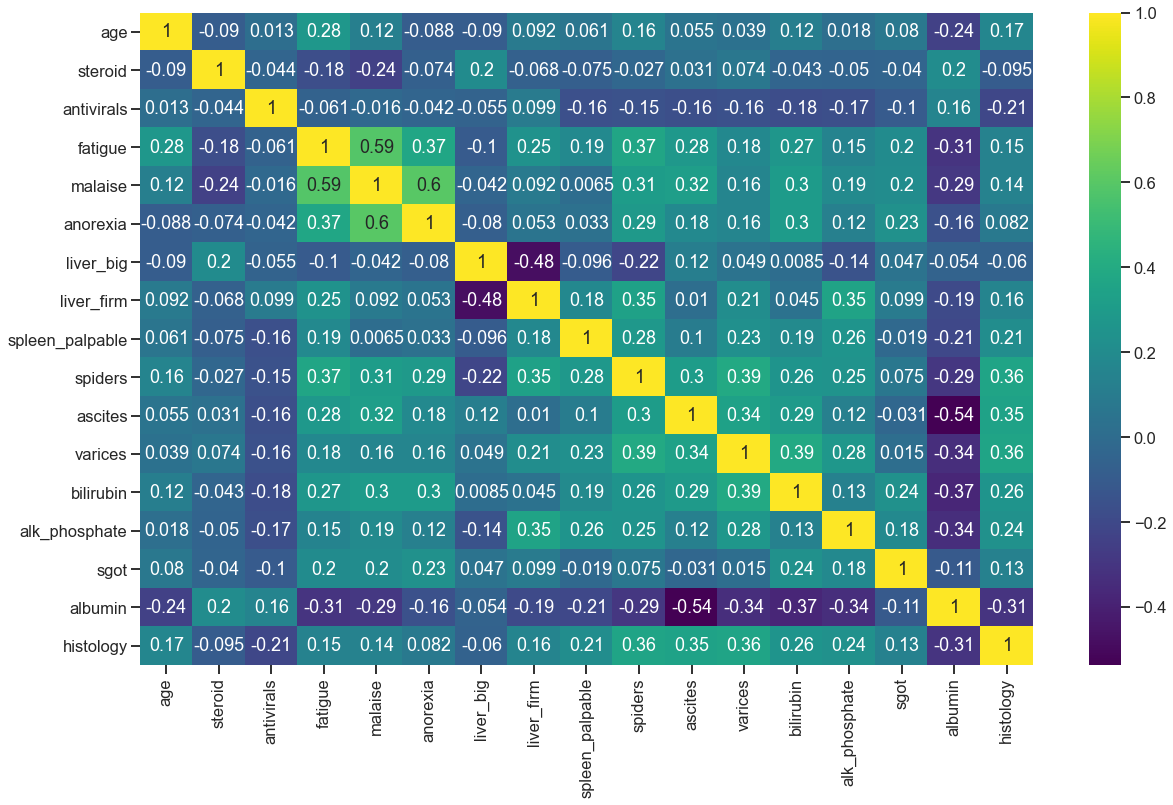

In [23]:
sns.set(style = "ticks", context = "talk")
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<AxesSubplot:xlabel='age', ylabel='Density'>

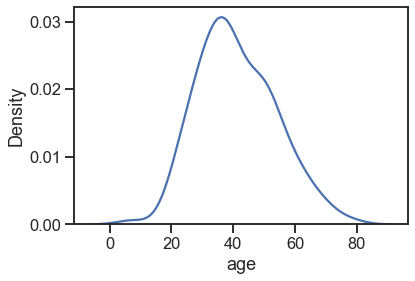

In [24]:
sns.kdeplot(df.age)

(array([ 1.,  3., 21., 29., 37., 21., 24., 11.,  6.,  2.]),
 array([ 7. , 14.1, 21.2, 28.3, 35.4, 42.5, 49.6, 56.7, 63.8, 70.9, 78. ]),
 <BarContainer object of 10 artists>)

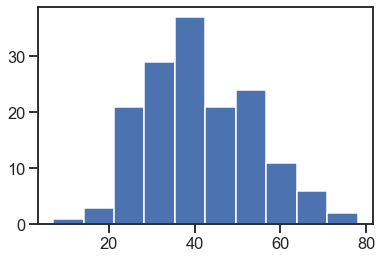

In [25]:
plt.hist(df.age)

<AxesSubplot:xlabel='bilirubin', ylabel='Density'>

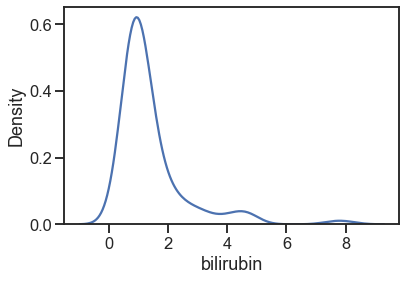

In [26]:
sns.kdeplot(df.bilirubin)

<Figure size 1440x720 with 0 Axes>

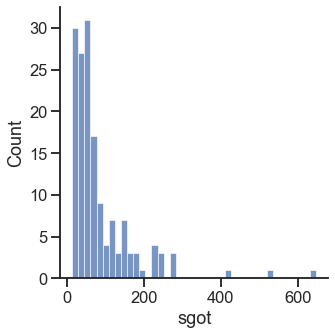

In [27]:
plt.figure(figsize=(20, 10))
sns.displot(df.sgot, bins=40)

<Figure size 1440x720 with 0 Axes>

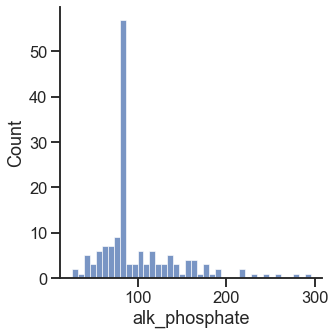

In [28]:
plt.figure(figsize=(20, 10))
sns.displot(df.alk_phosphate, bins=40)

<AxesSubplot:xlabel='alk_phosphate', ylabel='Density'>

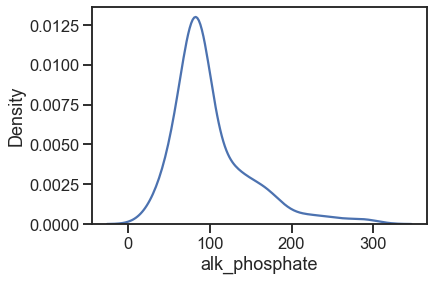

In [29]:
sns.kdeplot(df.alk_phosphate)

(array([11., 29., 69., 15., 13.,  9.,  2.,  3.,  2.,  2.]),
 array([ 26. ,  52.9,  79.8, 106.7, 133.6, 160.5, 187.4, 214.3, 241.2,
        268.1, 295. ]),
 <BarContainer object of 10 artists>)

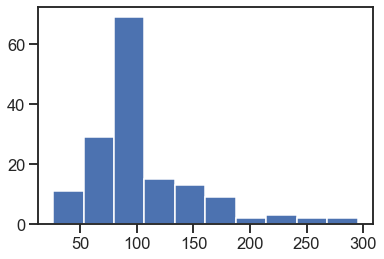

In [30]:
plt.hist(df.alk_phosphate)

<AxesSubplot:title={'center':'Gender Distribution'}>

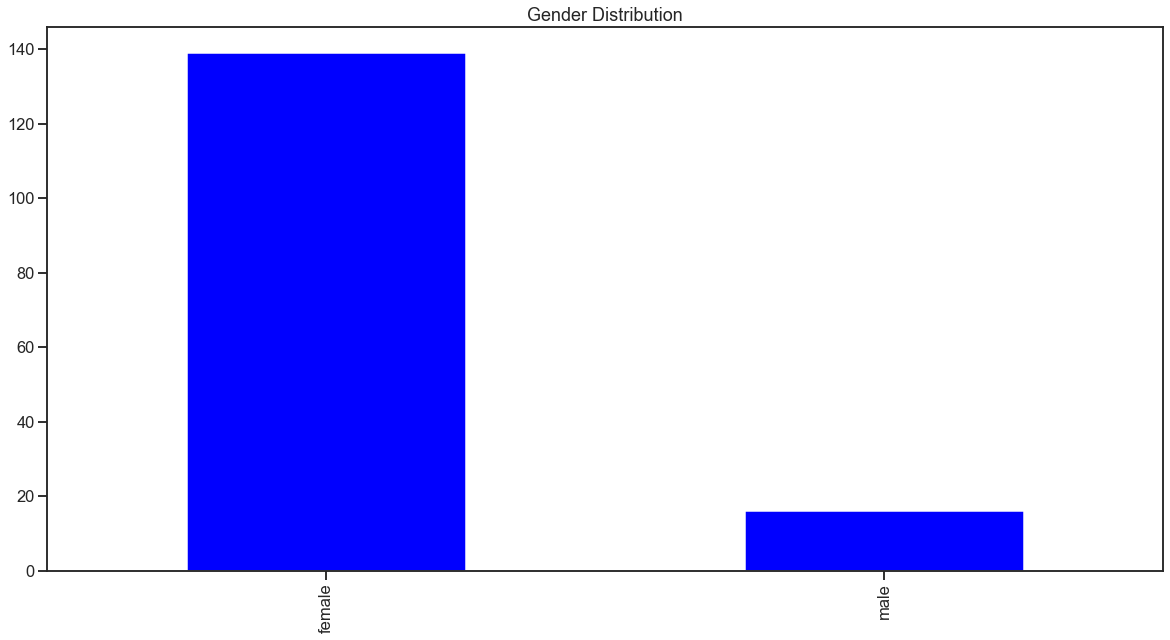

In [31]:
plt.figure(figsize=(20, 10))
df['sex'].value_counts().plot(kind="bar", color='blue', title='Gender Distribution')

In [32]:
df['class'].value_counts()

live    123
die      32
Name: class, dtype: int64

<AxesSubplot:title={'center':'class Distribution'}>

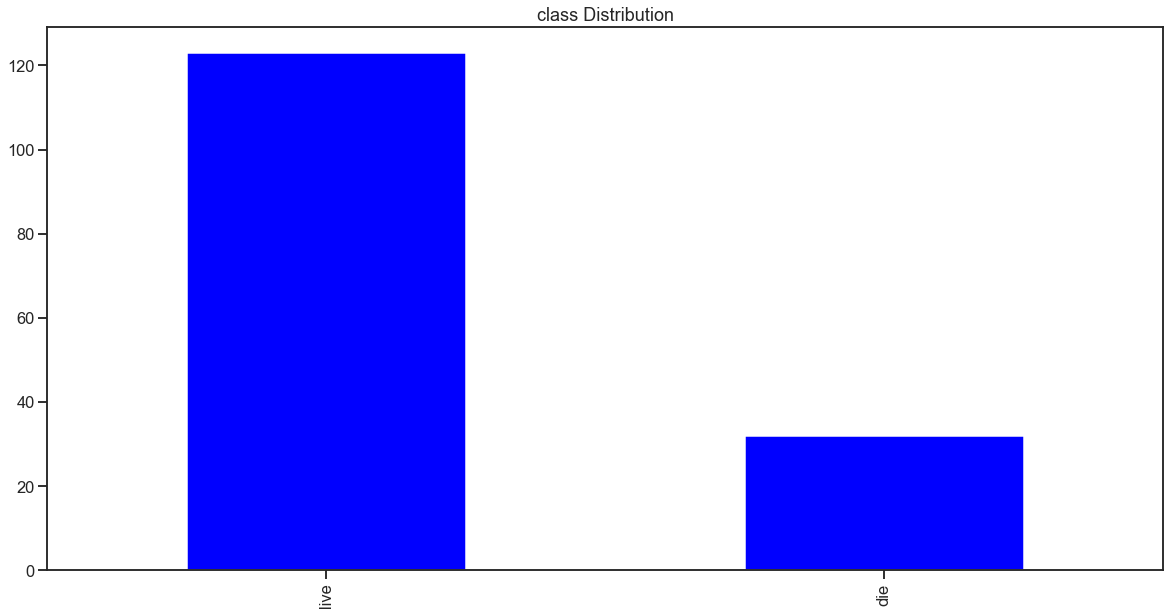

In [33]:
plt.figure(figsize=(20, 10))
df['class'].value_counts().plot(kind="bar", color='blue', title='class Distribution')

In [34]:
df_object = df.select_dtypes('object')
df_object

,sex,class
0,male,live
1,female,live
2,female,live
3,female,live
4,female,live
...,...,...
150,female,die
151,female,live
152,female,live
153,male,live


In [35]:
from sklearn.preprocessing import LabelEncoder

for i in df_object:
    df[i] = LabelEncoder().fit_transform(df[i])

In [36]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,1,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,1
1,50,0,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,1
2,78,0,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,1
3,31,0,True,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,False,1
4,34,0,True,False,False,False,False,True,False,False,False,False,False,1.0,85.0,200.0,4.0,False,1


In [37]:
df_bool = df.select_dtypes('bool')
df_bool

,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,True,False,False,False,False,False,False
3,True,True,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,True,True,True,True,False,False,True,True,True,True
151,True,False,True,False,False,True,True,False,False,False,False,True
152,False,False,True,True,False,False,True,False,True,False,False,True
153,False,False,True,False,False,True,False,True,True,False,True,True


In [38]:
for i in df_bool:
    df[i] = df[i]*1

In [39]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,0,1
3,31,0,1,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,85.0,200.0,4.0,0,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'steroid'}>,
        <AxesSubplot:title={'center':'antivirals'}>],
       [<AxesSubplot:title={'center':'fatigue'}>,
        <AxesSubplot:title={'center':'malaise'}>,
        <AxesSubplot:title={'center':'anorexia'}>,
        <AxesSubplot:title={'center':'liver_big'}>],
       [<AxesSubplot:title={'center':'liver_firm'}>,
        <AxesSubplot:title={'center':'spleen_palpable'}>,
        <AxesSubplot:title={'center':'spiders'}>,
        <AxesSubplot:title={'center':'ascites'}>],
       [<AxesSubplot:title={'center':'varices'}>,
        <AxesSubplot:title={'center':'bilirubin'}>,
        <AxesSubplot:title={'center':'alk_phosphate'}>,
        <AxesSubplot:title={'center':'sgot'}>],
       [<AxesSubplot:title={'center':'albumin'}>,
        <AxesSubplot:title={'center':'histology'}>,
        <AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=ob

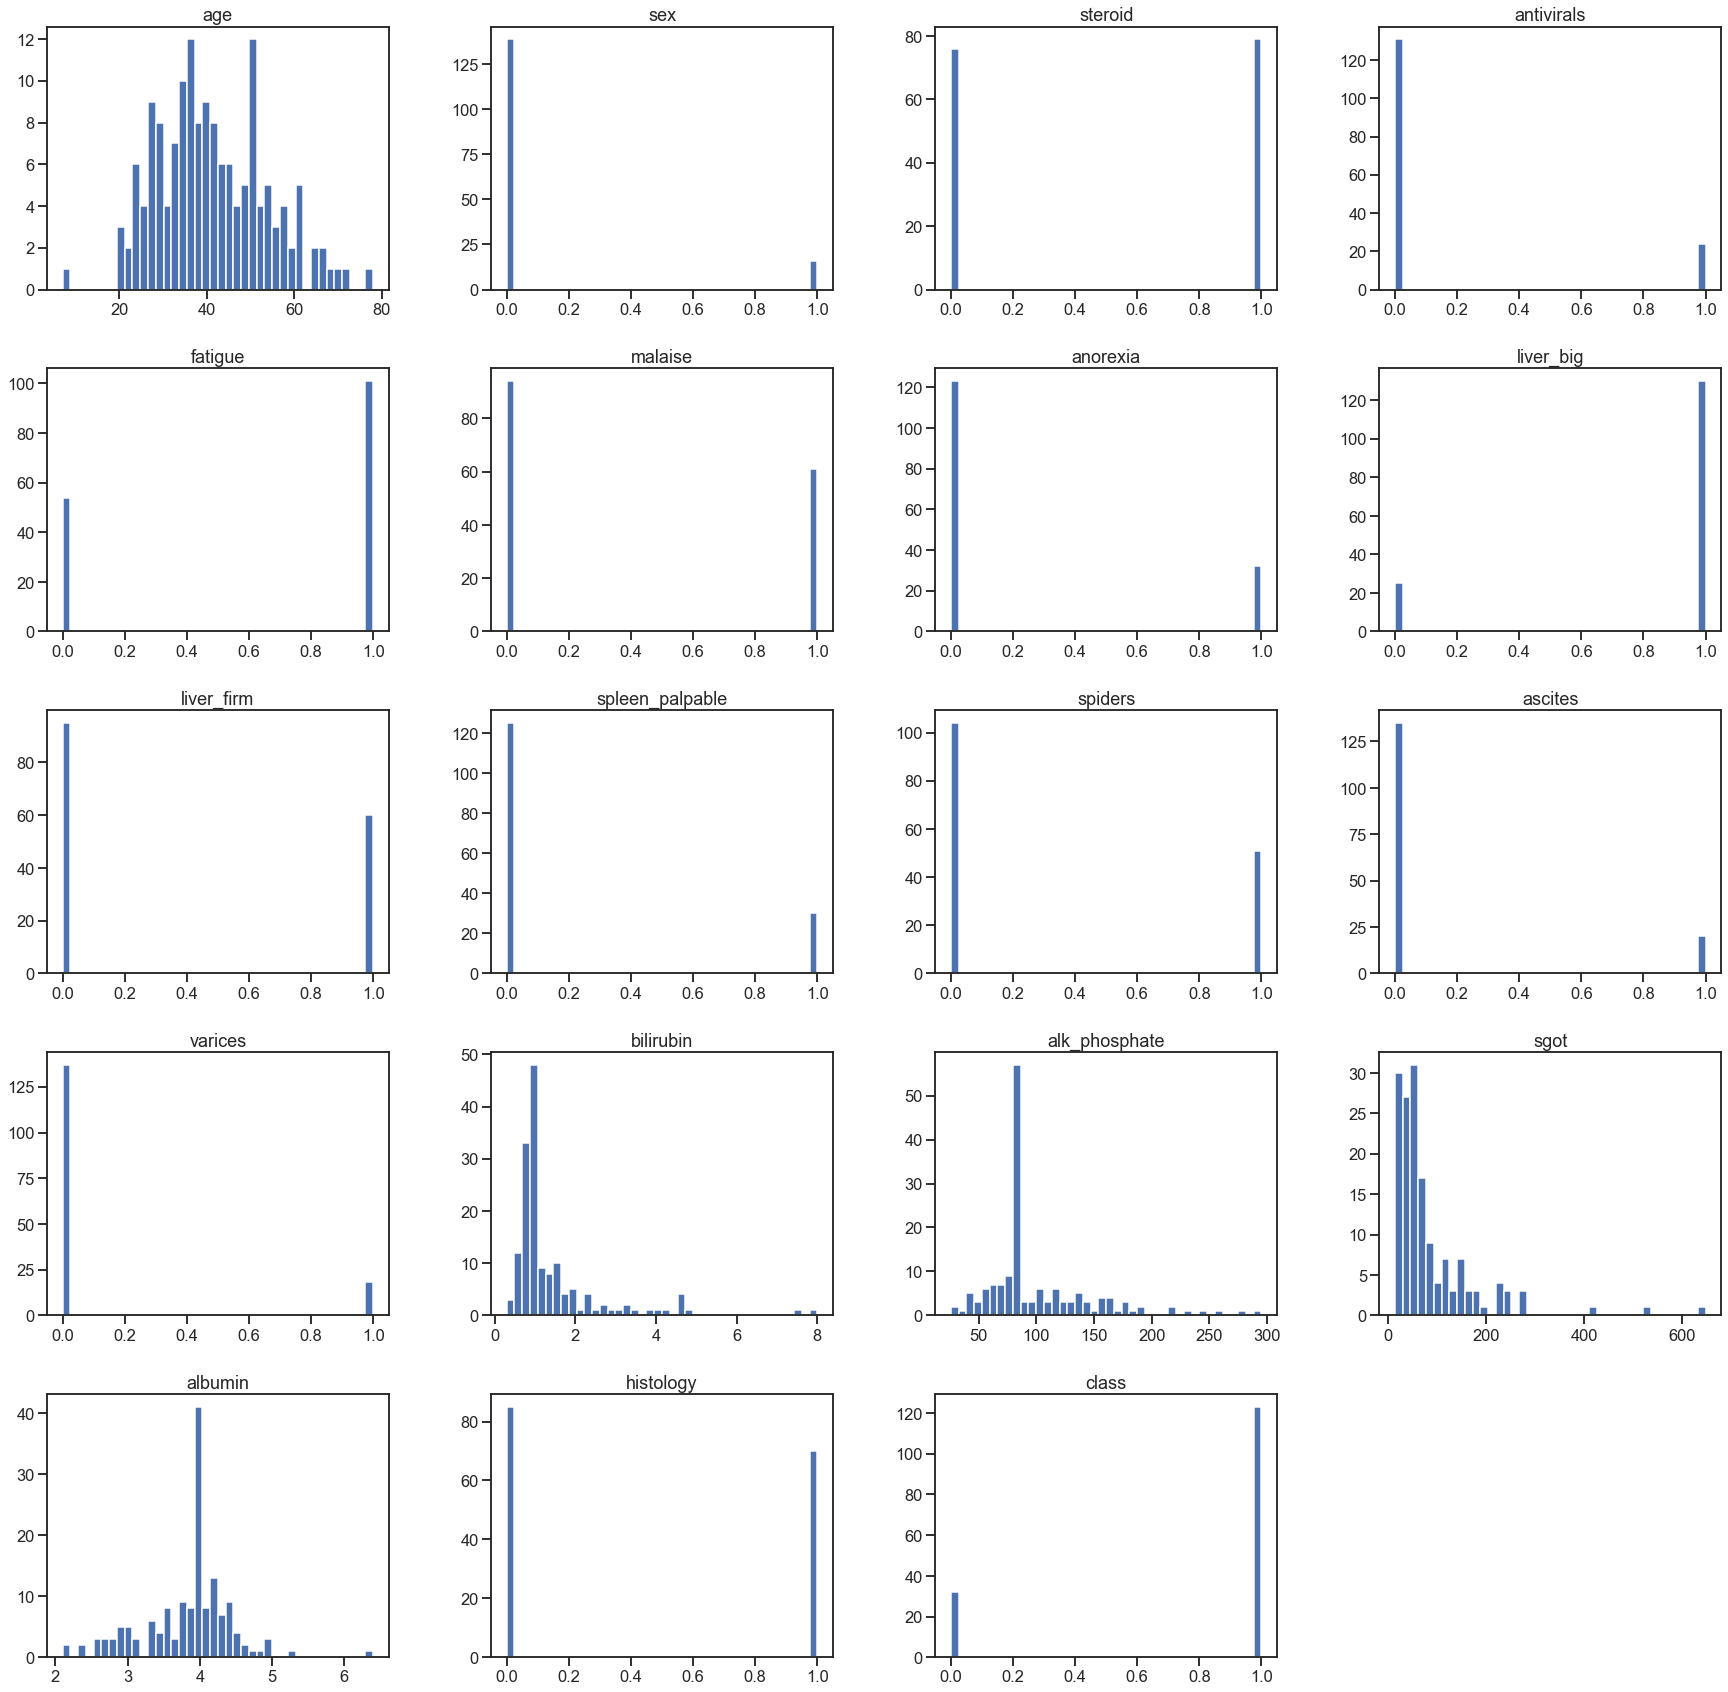

In [42]:
df.hist(figsize=(30,30),grid=False, bins=40)

### handling imbalnce data

In [51]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'minority',random_state = 7)
oversampled_df_x,oversampled_df_y = sm.fit_sample(df.drop('class',axis=1),df['class'])

oversampled_df = pd.concat([pd.DataFrame(oversampled_df_y),pd.DataFrame(oversampled_df_x)],axis=1)

oversampled_df.columns=normalized_df.columns

In [53]:
normalized_df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
117,50,0,1,0,0,0,0,1,0,0,0,0,0,1.0,139.0,81.0,3.9,1,1
75,32,0,0,1,1,1,0,1,0,0,0,0,0,1.0,55.0,45.0,4.1,0,1
51,39,0,1,0,0,0,0,1,0,0,0,0,0,1.0,85.0,20.0,4.0,0,1
40,52,0,0,1,0,0,0,1,0,0,0,0,0,0.7,75.0,55.0,4.0,0,1
14,47,0,0,1,0,0,0,1,0,0,0,0,0,1.0,85.0,60.0,4.0,0,1


C:\Users\madha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


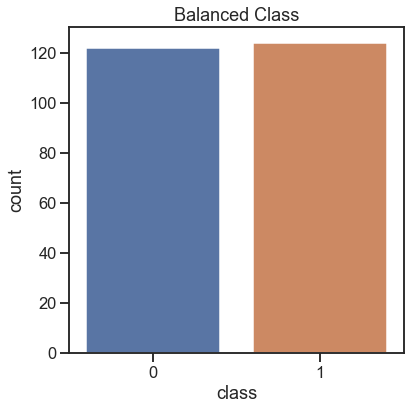

In [54]:
plt.figure(figsize=(6,6))
sns.countplot('class',data=oversampled_df)
plt.title('Balanced Class')
plt.show()